# Invitae Cohort Analysis

By Jackie Petersen

---

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

In [2]:
# reading in the data
orders = pd.read_csv('orders.csv')
customers = pd.read_csv('customers.csv')

### Exploring the data

In [3]:
orders.head()

,id,order_number,user_id,created
0,1709,36,344,2014-10-28 00:20:01
1,1406,7,608,2014-10-14 23:44:53
2,1716,6,2296,2014-10-28 17:47:07
3,1426,2,1225,2014-10-15 18:33:38
4,1415,6,797,2014-10-15 02:07:16


In [4]:
customers.head()

,id,created
0,35410,2015-07-03 22:01:11
1,35417,2015-07-03 22:11:23
2,35412,2015-07-03 22:02:52
3,35413,2015-07-03 22:05:02
4,35424,2015-07-03 22:21:55


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27575 entries, 0 to 27574
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27575 non-null  int64 
 1   order_number  27575 non-null  int64 
 2   user_id       27575 non-null  int64 
 3   created       27575 non-null  object
dtypes: int64(3), object(1)
memory usage: 861.8+ KB


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25716 entries, 0 to 25715
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       25716 non-null  int64 
 1   created  25716 non-null  object
dtypes: int64(1), object(1)
memory usage: 401.9+ KB


> There are no NaN's in the data.

In [7]:
orders.sort_values(by='user_id')

,id,order_number,user_id,created
26209,1,0,2,2014-05-16 00:13:50
25480,4,0,3,2014-05-21 20:40:05
26055,7,0,3,2014-05-21 23:00:14
26211,3,0,3,2014-05-21 20:39:23
26212,8,0,3,2014-05-22 20:51:22
...,...,...,...,...
21551,28730,1,35964,2015-07-08 02:05:56
21507,28743,1,35976,2015-07-08 03:04:46
21588,28752,1,35977,2015-07-08 03:37:49
21638,28805,1,35990,2015-07-08 15:40:00


In [8]:
len(orders['user_id'].unique())

7067

In [9]:
len(orders['id'].unique())

27575

> In the orders dataset, the `'id'` column contains all unique values, where the `'user_id'` has duplicate values, perhaps for multiple orders from the same customers.

In [10]:
customers.sort_values(by='id')

,id,created
1281,9483,2015-01-01 00:26:59
1072,9484,2015-01-01 00:51:40
1073,9485,2015-01-01 01:13:18
1074,9486,2015-01-01 01:57:02
1075,9487,2015-01-01 02:22:41
...,...,...
491,35948,2015-07-07 23:20:54
531,35949,2015-07-07 23:23:04
434,35950,2015-07-07 23:25:42
444,35951,2015-07-07 23:29:58


In [11]:
len(customers['id'].unique())

25716

> The `'id'` column in the customers dataset has all unique values.

### Renaming the columns to differentiate before combining

In [12]:
orders.rename(columns={'id':'orders_id', 'created':'order_created'}, inplace=True)
orders.head()

,orders_id,order_number,user_id,order_created
0,1709,36,344,2014-10-28 00:20:01
1,1406,7,608,2014-10-14 23:44:53
2,1716,6,2296,2014-10-28 17:47:07
3,1426,2,1225,2014-10-15 18:33:38
4,1415,6,797,2014-10-15 02:07:16


In [13]:
customers.rename(columns={'id':'user_id', 'created':'customer_created'}, inplace=True)
customers.head()

,user_id,customer_created
0,35410,2015-07-03 22:01:11
1,35417,2015-07-03 22:11:23
2,35412,2015-07-03 22:02:52
3,35413,2015-07-03 22:05:02
4,35424,2015-07-03 22:21:55


### Combining the two datasets

> On the `'user_id'` column from the orders dataset and the `'id'` column on the customers dataset, now renamed `'user_id'`.

In [14]:
df_combined = orders.merge(customers, on='user_id')
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created
0,8256,2,12654,2015-02-17 20:03:27,2015-01-20 02:45:51
1,12711,5,12654,2015-03-24 02:03:44,2015-01-20 02:45:51
2,11763,4,12654,2015-03-16 23:00:46,2015-01-20 02:45:51
3,21112,6,12654,2015-05-25 18:13:47,2015-01-20 02:45:51
4,22186,7,12654,2015-06-01 22:41:03,2015-01-20 02:45:51


In [15]:
len(df_combined['user_id'].unique())

5356

> There are 5356 unique customers now in the combined dataset.

In [16]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17015 entries, 0 to 17014
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   orders_id         17015 non-null  int64 
 1   order_number      17015 non-null  int64 
 2   user_id           17015 non-null  int64 
 3   order_created     17015 non-null  object
 4   customer_created  17015 non-null  object
dtypes: int64(3), object(2)
memory usage: 797.6+ KB


### Converting the `'order_created'` and `'customer_created'` columns to datetime format

In [17]:
df_combined['order_created'] = pd.to_datetime(df_combined['order_created'])
df_combined['customer_created'] = pd.to_datetime(df_combined['customer_created'])

In [18]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17015 entries, 0 to 17014
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   orders_id         17015 non-null  int64         
 1   order_number      17015 non-null  int64         
 2   user_id           17015 non-null  int64         
 3   order_created     17015 non-null  datetime64[ns]
 4   customer_created  17015 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 797.6 KB


### Converting the UTC timezone to US/Eastern

In [19]:
df_combined['order_created'] = df_combined['order_created'].dt.tz_localize(tz='UTC').dt.tz_convert(tz='US/Eastern')
df_combined['customer_created'] = df_combined['customer_created'].dt.tz_localize(tz='UTC').dt.tz_convert(tz='US/Eastern')

In [20]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17015 entries, 0 to 17014
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype                     
---  ------            --------------  -----                     
 0   orders_id         17015 non-null  int64                     
 1   order_number      17015 non-null  int64                     
 2   user_id           17015 non-null  int64                     
 3   order_created     17015 non-null  datetime64[ns, US/Eastern]
 4   customer_created  17015 non-null  datetime64[ns, US/Eastern]
dtypes: datetime64[ns, US/Eastern](2), int64(3)
memory usage: 797.6 KB


In [21]:
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created
0,8256,2,12654,2015-02-17 15:03:27-05:00,2015-01-19 21:45:51-05:00
1,12711,5,12654,2015-03-23 22:03:44-04:00,2015-01-19 21:45:51-05:00
2,11763,4,12654,2015-03-16 19:00:46-04:00,2015-01-19 21:45:51-05:00
3,21112,6,12654,2015-05-25 14:13:47-04:00,2015-01-19 21:45:51-05:00
4,22186,7,12654,2015-06-01 18:41:03-04:00,2015-01-19 21:45:51-05:00


### Stripping the extra timezone info off the end of the datetime columns, then converting back to datetime format

In [22]:
df_combined['order_created'] = df_combined['order_created'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_combined['customer_created'] = df_combined['customer_created'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_combined['order_created'] = pd.to_datetime(df_combined['order_created'])
df_combined['customer_created'] = pd.to_datetime(df_combined['customer_created'])

In [23]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17015 entries, 0 to 17014
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   orders_id         17015 non-null  int64         
 1   order_number      17015 non-null  int64         
 2   user_id           17015 non-null  int64         
 3   order_created     17015 non-null  datetime64[ns]
 4   customer_created  17015 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3)
memory usage: 797.6 KB


In [24]:
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created
0,8256,2,12654,2015-02-17 15:03:27,2015-01-19 21:45:51
1,12711,5,12654,2015-03-23 22:03:44,2015-01-19 21:45:51
2,11763,4,12654,2015-03-16 19:00:46,2015-01-19 21:45:51
3,21112,6,12654,2015-05-25 14:13:47,2015-01-19 21:45:51
4,22186,7,12654,2015-06-01 18:41:03,2015-01-19 21:45:51


### Creating a column with the difference in days of the customer creation and the order creation

In [25]:
df_combined['time_difference'] = df_combined['order_created'] - df_combined['customer_created']
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference
0,8256,2,12654,2015-02-17 15:03:27,2015-01-19 21:45:51,28 days 17:17:36
1,12711,5,12654,2015-03-23 22:03:44,2015-01-19 21:45:51,63 days 00:17:53
2,11763,4,12654,2015-03-16 19:00:46,2015-01-19 21:45:51,55 days 21:14:55
3,21112,6,12654,2015-05-25 14:13:47,2015-01-19 21:45:51,125 days 16:27:56
4,22186,7,12654,2015-06-01 18:41:03,2015-01-19 21:45:51,132 days 20:55:12


In [26]:
# converting the column to int to strip the extra info
df_combined['time_difference'] = df_combined['time_difference'].dt.days
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference
0,8256,2,12654,2015-02-17 15:03:27,2015-01-19 21:45:51,28
1,12711,5,12654,2015-03-23 22:03:44,2015-01-19 21:45:51,63
2,11763,4,12654,2015-03-16 19:00:46,2015-01-19 21:45:51,55
3,21112,6,12654,2015-05-25 14:13:47,2015-01-19 21:45:51,125
4,22186,7,12654,2015-06-01 18:41:03,2015-01-19 21:45:51,132


### Stripping the timestamp from the `'order_created'` and `'customer_created'` columns and adding columns with the week number for both

In [27]:
# creating columns for the ISO week numbers
df_combined['order_week'] = df_combined['order_created'].dt.isocalendar()['week']
df_combined['customer_week'] = df_combined['customer_created'].dt.isocalendar()['week']

# stripping the timestamp info
df_combined['order_created'] = df_combined['order_created'].dt.date
df_combined['customer_created'] = df_combined['customer_created'].dt.date
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference,order_week,customer_week
0,8256,2,12654,2015-02-17,2015-01-19,28,8,4
1,12711,5,12654,2015-03-23,2015-01-19,63,13,4
2,11763,4,12654,2015-03-16,2015-01-19,55,12,4
3,21112,6,12654,2015-05-25,2015-01-19,125,22,4
4,22186,7,12654,2015-06-01,2015-01-19,132,23,4


### Adding a column for the first order for each customer, subtracted from the day of `'customer_created'`

In [28]:
df_combined['first_order_difference'] = (df_combined.groupby('user_id')['order_created'].transform('min')\
                                        - df_combined['customer_created']).dt.days
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference,order_week,customer_week,first_order_difference
0,8256,2,12654,2015-02-17,2015-01-19,28,8,4,0
1,12711,5,12654,2015-03-23,2015-01-19,63,13,4,0
2,11763,4,12654,2015-03-16,2015-01-19,55,12,4,0
3,21112,6,12654,2015-05-25,2015-01-19,125,22,4,0
4,22186,7,12654,2015-06-01,2015-01-19,132,23,4,0


### Creating column for `'cohort'`

In [29]:
# adapted from https://stackoverflow.com/questions/67697602/convert-week-number-in-dataframe-to-start-date-of-week-monday
# & http://mvsourcecode.com/python-how-to-get-date-range-from-week-number-mvsourcecode/

# creating the first date for the week & fixing format
firstdateofweek = pd.to_datetime(
    '2015' + df_combined['customer_week'].astype(str) + "1",
    format='%G%V%w')

# creating the last day of the week using the first day & fixing format
lastdayofweek = (pd.to_datetime(
    '2015' + df_combined['customer_week'].astype(str) + "1",
    format='%G%V%w')) + datetime.timedelta(days=6.9)
lastdayofweek = lastdayofweek.dt.strftime('%Y-%m-%d')

# creating the final cohort column combining these two dates
df_combined['cohort'] = firstdateofweek.astype(str) + ' - ' + lastdayofweek.astype(str)

In [30]:
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference,order_week,customer_week,first_order_difference,cohort
0,8256,2,12654,2015-02-17,2015-01-19,28,8,4,0,2015-01-19 - 2015-01-25
1,12711,5,12654,2015-03-23,2015-01-19,63,13,4,0,2015-01-19 - 2015-01-25
2,11763,4,12654,2015-03-16,2015-01-19,55,12,4,0,2015-01-19 - 2015-01-25
3,21112,6,12654,2015-05-25,2015-01-19,125,22,4,0,2015-01-19 - 2015-01-25
4,22186,7,12654,2015-06-01,2015-01-19,132,23,4,0,2015-01-19 - 2015-01-25


### Converting the `'time_difference'` column from days to groupings of multiples of 7

In [31]:
# checking to see what the biggest number day there is in the dataset

df_combined['time_difference'].sort_values().tail()

9411    180
124     180
7646    181
27      183
7647    186
Name: time_difference, dtype: int64

### Converting the `'time_difference'` and `'first_order'` to buckets

In [32]:
df_combined['time_dif_buckets'] = pd.cut(df_combined['time_difference'], 
                                bins=np.arange(0,190,7), right=False, include_lowest=True)

df_combined['first_order_buckets'] = pd.cut(df_combined['first_order_difference'], 
                                bins=np.arange(0,190,7), right=False, include_lowest=True)

In [33]:
df_combined.head()

,orders_id,order_number,user_id,order_created,customer_created,time_difference,order_week,customer_week,first_order_difference,cohort,time_dif_buckets,first_order_buckets
0,8256,2,12654,2015-02-17,2015-01-19,28,8,4,0,2015-01-19 - 2015-01-25,"[28, 35)","[0, 7)"
1,12711,5,12654,2015-03-23,2015-01-19,63,13,4,0,2015-01-19 - 2015-01-25,"[63, 70)","[0, 7)"
2,11763,4,12654,2015-03-16,2015-01-19,55,12,4,0,2015-01-19 - 2015-01-25,"[49, 56)","[0, 7)"
3,21112,6,12654,2015-05-25,2015-01-19,125,22,4,0,2015-01-19 - 2015-01-25,"[119, 126)","[0, 7)"
4,22186,7,12654,2015-06-01,2015-01-19,132,23,4,0,2015-01-19 - 2015-01-25,"[126, 133)","[0, 7)"


### Getting the distinct customers from each bucket

In [34]:
# the customers column is the # of distinct customers for each bucket in terms of orders

df_2 = df_combined.groupby(['cohort', 'time_dif_buckets'])\
                .agg(customers=('user_id', 'nunique')).reset_index(drop=False)
df_2.head()

,cohort,time_dif_buckets,customers
0,2014-12-29 - 2015-01-04,"[0, 7)",21
1,2014-12-29 - 2015-01-04,"[7, 14)",12
2,2014-12-29 - 2015-01-04,"[14, 21)",9
3,2014-12-29 - 2015-01-04,"[21, 28)",7
4,2014-12-29 - 2015-01-04,"[28, 35)",10


In [35]:
# the distinct customers for each first order bucket

df_2_2 = df_combined.groupby(['cohort', 'first_order_buckets'])\
                .agg(first_order_customers=('user_id', 'nunique')).reset_index(drop=False)

df_2_2.head()

,cohort,first_order_buckets,first_order_customers
0,2014-12-29 - 2015-01-04,"[0, 7)",21
1,2014-12-29 - 2015-01-04,"[7, 14)",5
2,2014-12-29 - 2015-01-04,"[14, 21)",0
3,2014-12-29 - 2015-01-04,"[21, 28)",1
4,2014-12-29 - 2015-01-04,"[28, 35)",2


In [36]:
df_2[df_2['time_dif_buckets']==df_2_2['first_order_buckets']]

,cohort,time_dif_buckets,customers
0,2014-12-29 - 2015-01-04,"[0, 7)",21
1,2014-12-29 - 2015-01-04,"[7, 14)",12
2,2014-12-29 - 2015-01-04,"[14, 21)",9
3,2014-12-29 - 2015-01-04,"[21, 28)",7
4,2014-12-29 - 2015-01-04,"[28, 35)",10
...,...,...,...
751,2015-07-06 - 2015-07-12,"[154, 161)",0
752,2015-07-06 - 2015-07-12,"[161, 168)",0
753,2015-07-06 - 2015-07-12,"[168, 175)",0
754,2015-07-06 - 2015-07-12,"[175, 182)",0


> This is checking that the buckets columns in each df (`'time_dif_buckets'` & `'first_order_buckets'`) are the same, thus we can combine the two dfs now with the different customer count.

In [37]:
df_2['first_order_customers'] = df_2_2['first_order_customers']
df_2.head()

,cohort,time_dif_buckets,customers,first_order_customers
0,2014-12-29 - 2015-01-04,"[0, 7)",21,21
1,2014-12-29 - 2015-01-04,"[7, 14)",12,5
2,2014-12-29 - 2015-01-04,"[14, 21)",9,0
3,2014-12-29 - 2015-01-04,"[21, 28)",7,1
4,2014-12-29 - 2015-01-04,"[28, 35)",10,2


### Creating pivot table for total customers

In [38]:
df_2_pivot = df_2.pivot_table(index='cohort', columns='time_dif_buckets', values='customers')

# adding a column for the total number of customers per cohort
df_2_pivot['customers_total'] = df_2.groupby('cohort').sum('customers')['customers']

# moving this column to the first columns
df_2_pivot.insert(0, 'customers_total', df_2_pivot.pop('customers_total'))

df_2_pivot.head()

time_dif_buckets,customers_total,"[0, 7)","[7, 14)","[14, 21)","[21, 28)","[28, 35)","[35, 42)","[42, 49)","[49, 56)","[56, 63)",...,"[119, 126)","[126, 133)","[133, 140)","[140, 147)","[147, 154)","[154, 161)","[161, 168)","[168, 175)","[175, 182)","[182, 189)"
cohort,,,,,,,,,,,,,,,,,,,,,
2014-12-29 - 2015-01-04,160,21,12,9,7,10,6,5,6,7,...,6,8,3,3,4,2,4,5,3,2
2015-01-05 - 2015-01-11,1471,147,105,66,73,69,53,61,71,61,...,47,38,44,36,40,49,54,36,28,0
2015-01-12 - 2015-01-18,1439,194,94,77,54,54,65,68,57,66,...,50,44,46,38,51,40,36,30,2,0
2015-01-19 - 2015-01-25,1469,211,97,55,64,61,74,66,61,56,...,44,48,56,50,34,34,28,1,0,0
2015-01-26 - 2015-02-01,848,133,43,45,29,47,32,37,37,31,...,30,26,31,25,31,26,0,0,0,0


### Creating pivot table for first order customers

In [39]:
df_2_pivot_first = df_2.pivot_table(index='cohort', columns='time_dif_buckets', values='first_order_customers')

# adding a column for the total number of first order customers per cohort
df_2_pivot_first['first_order_customers_total'] = df_2.groupby('cohort').sum('customers')['first_order_customers']

# moving this new column to the first column
df_2_pivot_first.insert(0, 'first_order_customers_total', df_2_pivot_first.pop('first_order_customers_total'))


df_2_pivot_first.head()

time_dif_buckets,first_order_customers_total,"[0, 7)","[7, 14)","[14, 21)","[21, 28)","[28, 35)","[35, 42)","[42, 49)","[49, 56)","[56, 63)",...,"[119, 126)","[126, 133)","[133, 140)","[140, 147)","[147, 154)","[154, 161)","[161, 168)","[168, 175)","[175, 182)","[182, 189)"
cohort,,,,,,,,,,,,,,,,,,,,,
2014-12-29 - 2015-01-04,36,21,5,0,1,2,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2015-01-05 - 2015-01-11,410,144,70,31,21,17,11,12,13,15,...,4,5,2,2,4,1,5,3,4,0
2015-01-12 - 2015-01-18,382,190,48,21,13,10,8,14,6,13,...,3,5,1,5,7,5,0,1,1,0
2015-01-19 - 2015-01-25,468,208,60,24,22,18,24,19,10,9,...,3,1,4,3,2,2,2,0,0,0
2015-01-26 - 2015-02-01,229,130,21,12,7,9,7,6,4,3,...,2,3,0,1,1,1,0,0,0,0


In [40]:
# getting a percentage of the total customers ordering per bucket
df_2_total_percentages = df_2_pivot.divide(df_2_pivot['customers_total'], axis=0)*100
df_2_total_percentages.head()

time_dif_buckets,customers_total,"[0, 7)","[7, 14)","[14, 21)","[21, 28)","[28, 35)","[35, 42)","[42, 49)","[49, 56)","[56, 63)",...,"[119, 126)","[126, 133)","[133, 140)","[140, 147)","[147, 154)","[154, 161)","[161, 168)","[168, 175)","[175, 182)","[182, 189)"
cohort,,,,,,,,,,,,,,,,,,,,,
2014-12-29 - 2015-01-04,100.0,13.125000,7.500000,5.625000,4.375000,6.250000,3.750000,3.125000,3.750000,4.375000,...,3.750000,5.000000,1.875000,1.875000,2.500000,1.250000,2.500000,3.125000,1.875000,1.25
2015-01-05 - 2015-01-11,100.0,9.993202,7.138001,4.486744,4.962610,4.690687,3.602991,4.146839,4.826649,4.146839,...,3.195105,2.583277,2.991162,2.447315,2.719239,3.331067,3.670972,2.447315,1.903467,0.00
2015-01-12 - 2015-01-18,100.0,13.481584,6.532314,5.350938,3.752606,3.752606,4.517026,4.725504,3.961084,4.586518,...,3.474635,3.057679,3.196664,2.640723,3.544128,2.779708,2.501737,2.084781,0.138985,0.00
2015-01-19 - 2015-01-25,100.0,14.363513,6.603131,3.744044,4.356705,4.152485,5.037440,4.492852,4.152485,3.812117,...,2.995235,3.267529,3.812117,3.403676,2.314500,2.314500,1.906059,0.068074,0.000000,0.00
2015-01-26 - 2015-02-01,100.0,15.683962,5.070755,5.306604,3.419811,5.542453,3.773585,4.363208,4.363208,3.655660,...,3.537736,3.066038,3.655660,2.948113,3.655660,3.066038,0.000000,0.000000,0.000000,0.00


In [41]:
# getting a percentage of the first order customers ordering per bucket
df_2_first_percentages = df_2_pivot_first.divide(df_2_pivot_first['first_order_customers_total'], axis=0)*100
df_2_first_percentages.head()

time_dif_buckets,first_order_customers_total,"[0, 7)","[7, 14)","[14, 21)","[21, 28)","[28, 35)","[35, 42)","[42, 49)","[49, 56)","[56, 63)",...,"[119, 126)","[126, 133)","[133, 140)","[140, 147)","[147, 154)","[154, 161)","[161, 168)","[168, 175)","[175, 182)","[182, 189)"
cohort,,,,,,,,,,,,,,,,,,,,,
2014-12-29 - 2015-01-04,100.0,58.333333,13.888889,0.000000,2.777778,5.555556,0.000000,2.777778,0.000000,2.777778,...,0.000000,2.777778,0.000000,0.000000,0.000000,0.000000,0.000000,2.777778,0.00000,0.0
2015-01-05 - 2015-01-11,100.0,35.121951,17.073171,7.560976,5.121951,4.146341,2.682927,2.926829,3.170732,3.658537,...,0.975610,1.219512,0.487805,0.487805,0.975610,0.243902,1.219512,0.731707,0.97561,0.0
2015-01-12 - 2015-01-18,100.0,49.738220,12.565445,5.497382,3.403141,2.617801,2.094241,3.664921,1.570681,3.403141,...,0.785340,1.308901,0.261780,1.308901,1.832461,1.308901,0.000000,0.261780,0.26178,0.0
2015-01-19 - 2015-01-25,100.0,44.444444,12.820513,5.128205,4.700855,3.846154,5.128205,4.059829,2.136752,1.923077,...,0.641026,0.213675,0.854701,0.641026,0.427350,0.427350,0.427350,0.000000,0.00000,0.0
2015-01-26 - 2015-02-01,100.0,56.768559,9.170306,5.240175,3.056769,3.930131,3.056769,2.620087,1.746725,1.310044,...,0.873362,1.310044,0.000000,0.436681,0.436681,0.436681,0.000000,0.000000,0.00000,0.0


### Combining the two pivot tables to make our final table with the total orders per bucket and first orders per bucket, in percentages

### Heatmap depicting the customer orders by cohort

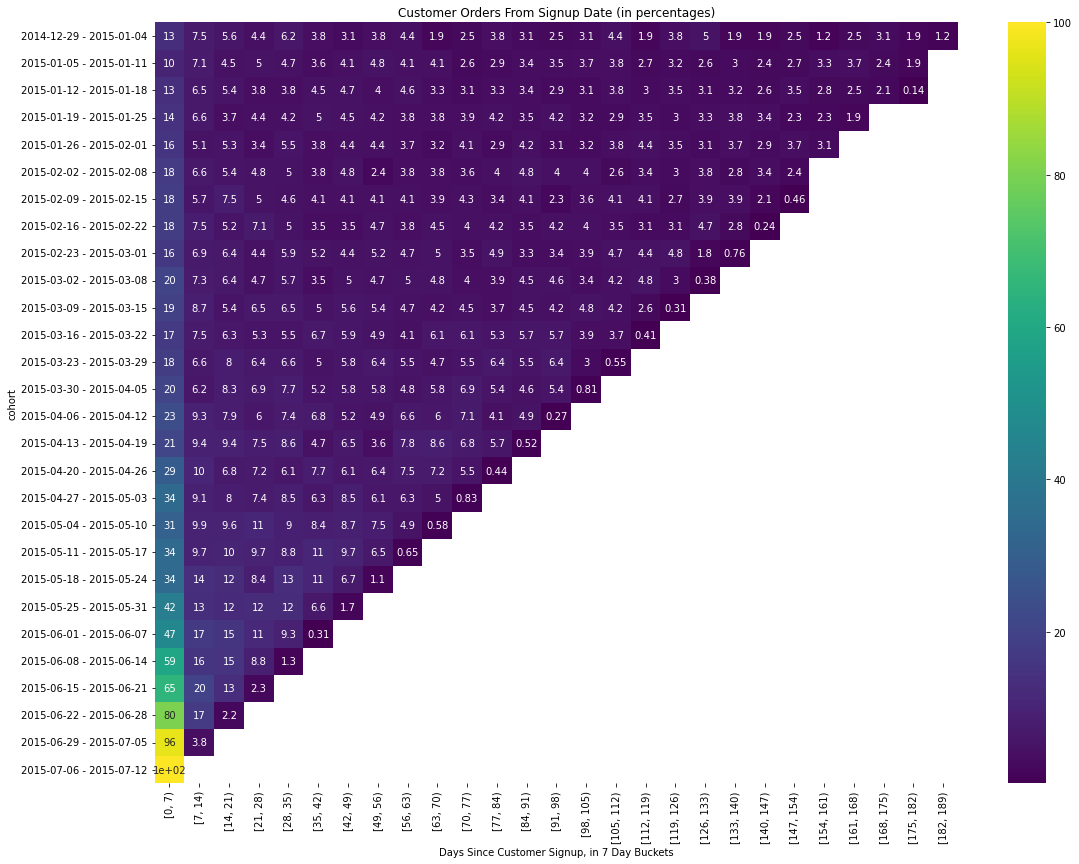

In [42]:
plt.figure(figsize=(18,14))
plt.title('Customer Orders From Signup Date (in percentages)')
sns.heatmap(df_2_total_percentages.drop(columns='customers_total'), annot=True, vmin=0.1, vmax=100, 
            mask=df_2_total_percentages.drop(columns='customers_total') < 0.1, cmap='viridis')
plt.xlabel('Days Since Customer Signup, in 7 Day Buckets');

> The above heatmap is showing the percentage of customer orders from their signup date in percentages. For example, for the week of 2015-06-22 - 2015-06-28, 80% of customers ordered within their first week of signup (0-6 days after), 17% ordered within their second week after signup (7-13 days after), and 2.2% ordered in their third week after signup (14-20 days after). It appears as though the majority of people order within their first 7 days of signup and then taper off over time. 

### Heatmap depicting the first customer orders by cohort

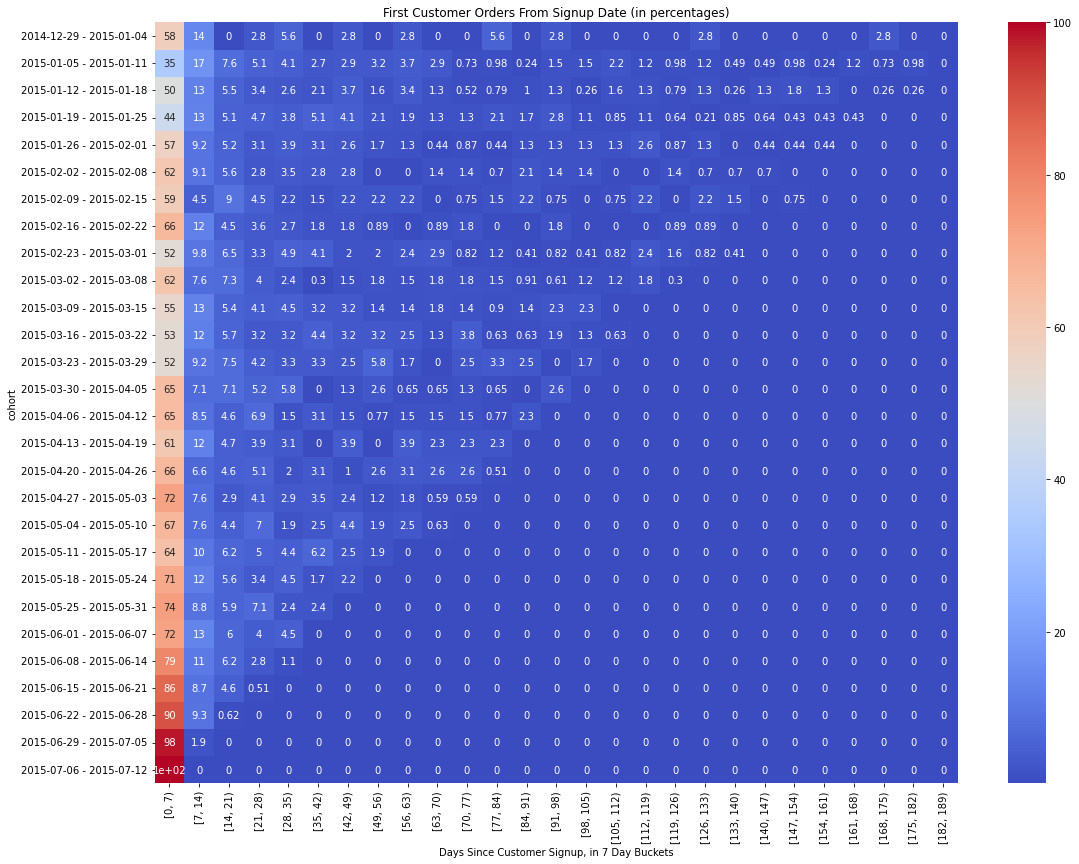

In [43]:
plt.figure(figsize=(18,14))
plt.title('First Customer Orders From Signup Date (in percentages)')
sns.heatmap(df_2_first_percentages.drop(columns='first_order_customers_total'), annot=True, vmin=0.1, vmax=100, cmap='coolwarm')
plt.xlabel('Days Since Customer Signup, in 7 Day Buckets');

> The above heatmap is showing the percentage of customers first orders from their signup date in percentages. Like above, it appears that the majority of customers tend to order for the first time pretty quickly after signing up.
>> Since there were some zero values in the rows, I decided not to mask the bottom zeros for visual purposes.

In [44]:
df_final = pd.concat([df_2_pivot.drop(columns='customers_total'), df_2_pivot_first.drop(columns='first_order_customers_total')])

# getting the two values side by side for total orders and just first orders
df_final = df_final.reset_index().groupby('cohort').agg({'first', 'last'})

# renaming the columns to make better sense
df_final.rename(columns={'last':'orders', 'first':'first_orders'}, inplace=True)

# adding in the total customer column from above
df_final['customers_total'] = df_2_pivot['customers_total']

# converting the raw numbers to percentages and removing the total customer counts
df_final_percentages = (df_final.divide(df_final['customers_total'], axis=0)*100).round(2).drop(columns='customers_total', axis=1)

# adding back in the total customer counts (the raw numbers, not just 100%)
df_final_percentages['customers_total'] = df_final['customers_total']

# moving this column to the first spot
df_final_percentages.insert(0, 'customers_total', df_final_percentages.pop('customers_total'))
df_final_percentages

time_dif_buckets        customers_total  [0, 7)              [7, 14)  \
                                         orders first_orders  orders   
cohort                                                                 
2014-12-29 - 2015-01-04             160   13.12        13.12    3.12   
2015-01-05 - 2015-01-11            1471    9.79         9.99    4.76   
2015-01-12 - 2015-01-18            1439   13.20        13.48    3.34   
2015-01-19 - 2015-01-25            1469   14.16        14.36    4.08   
2015-01-26 - 2015-02-01             848   15.33        15.68    2.48   
2015-02-02 - 2015-02-08             499   17.64        17.64    2.61   
2015-02-09 - 2015-02-15             439   18.00        18.00    1.37   
2015-02-16 - 2015-02-22             424   17.45        17.69    3.30   
2015-02-23 - 2015-03-01             793   16.14        16.39    3.03   
2015-03-02 - 2015-03-08            1053   19.47        20.04    2.37   
2015-03-09 - 2015-03-15             645   18.76        19.22    4.34   
2015-03-16 - 2015-03-22             493   16.84        17.24    3.85   
2015-03-23 - 2015-03-29             362   17.40        17.68    3.04   
2015-03-30 - 2015-04-05             496   20.16        20.16    2.22   
2015-04-06 - 2015-04-12             365   23.29        23.29    3.01   
2015-04-13 - 2015-04-19             385   20.52        21.04    4.16   
2015-04-20 - 2015-04-26             456   28.51        28.73    2.85   
2015-04-27 - 2015-05-03             363   33.88        33.88    3.58   
2015-05-04 - 2015-05-10             345   30.72        30.72    3.48   
2015-05-11 - 2015-05-17             308   33.12        34.09    5.19   
2015-05-18 - 2015-05-24             371   33.96        34.23    5.66   
2015-05-25 - 2015-05-31             302   41.39        42.05    4.97   
2015-06-01 - 2015-06-07             324   44.75        46.91    8.02   
2015-06-08 - 2015-06-14             238   58.40        59.24    7.98   
2015-06-15 - 2015-06-21             259   64.86        65.25    6.56   
2015-06-22 - 2015-06-28             184   79.35        80.43    8.15   
2015-06-29 - 2015-07-05             159   96.23        96.23    1.89   
2015-07-06 - 2015-07-12              34  100.00       100.00    0.00   

time_dif_buckets                     [14, 21)              [21, 28)  \
                        first_orders   orders first_orders   orders   
cohort                                                                
2014-12-29 - 2015-01-04         7.50     0.00         5.62     0.62   
2015-01-05 - 2015-01-11         7.14     2.11         4.49     1.43   
2015-01-12 - 2015-01-18         6.53     1.46         5.35     0.90   
2015-01-19 - 2015-01-25         6.60     1.63         3.74     1.50   
2015-01-26 - 2015-02-01         5.07     1.42         5.31     0.83   
2015-02-02 - 2015-02-08         6.61     1.60         5.41     0.80   
2015-02-09 - 2015-02-15         5.69     2.73         7.52     1.37   
2015-02-16 - 2015-02-22         7.55     1.18         5.19     0.94   
2015-02-23 - 2015-03-01         6.94     2.02         6.43     1.01   
2015-03-02 - 2015-03-08         7.31     2.28         6.36     1.23   
2015-03-09 - 2015-03-15         8.68     1.86         5.43     1.40   
2015-03-16 - 2015-03-22         7.51     1.83         6.29     1.01   
2015-03-23 - 2015-03-29         6.63     2.49         8.01     1.38   
2015-03-30 - 2015-04-05         6.25     2.22         8.27     1.61   
2015-04-06 - 2015-04-12         9.32     1.64         7.95     2.47   
2015-04-13 - 2015-04-19         9.35     1.56         9.35     1.30   
2015-04-20 - 2015-04-26        10.31     1.97         6.80     2.19   
2015-04-27 - 2015-05-03         9.09     1.38         7.99     1.93   
2015-05-04 - 2015-05-10         9.86     2.03         9.57     3.19   
2015-05-11 - 2015-05-17         9.74     3.25        10.06     2.60   
2015-05-18 - 2015-05-24        13.75     2.70        12.40     1.62   
2015-05-25 - 2015-05-31        13.25     3.31        11.92     

In [46]:
# exporting this final df to CSV file

df_final_percentages.to_csv('./final_percentages.csv')